In [18]:
# 📊 DBSCAN Example: Clustering Synthetic Data with Noise

# -----------------------------------------
# 🧰 Import necessary libraries
# -----------------------------------------

import numpy as np  # ➕ NumPy is used for numerical operations; np is a common alias
import matplotlib.pyplot as plt  # 📈 For plotting graphs; plt is the common alias
from sklearn.datasets import make_moons  # 🌙 Used to generate a toy 2D dataset shaped like moons
from sklearn.cluster import DBSCAN  # 🤖 DBSCAN = Density-Based Spatial Clustering of Applications with Noise
from dbscan import DBSCANCluster  # 🧩 A custom wrapper class (you must have this in dbscan.py)

In [19]:
# -----------------------------------------
# Step 1: Generate toy data
# -----------------------------------------

# 💡 make_moons returns 2D crescent-shaped data. Great for testing non-linear clustering.

# `X` holds the data points (shape: [300, 2])
# `_` holds the labels (not used here, hence the underscore — common Python practice)
X, _ = make_moons(n_samples=300, noise=0.1, random_state=42)
outlier = np.array([[1, 1.5]])  # 🏴‍☠️ Adding a single outlier point to test noise detection
X = np.vstack((X, outlier))  # 📦 Combine the original data with the outlier

# Arguments:
# - n_samples=300 → Total number of data points
# - noise=0.1 → Adds Gaussian noise to make the data a bit messy
# - random_state=42 → Sets a seed for reproducibility (same result every time)

c:\Users\Logan\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127769 (\N{CRESCENT MOON}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


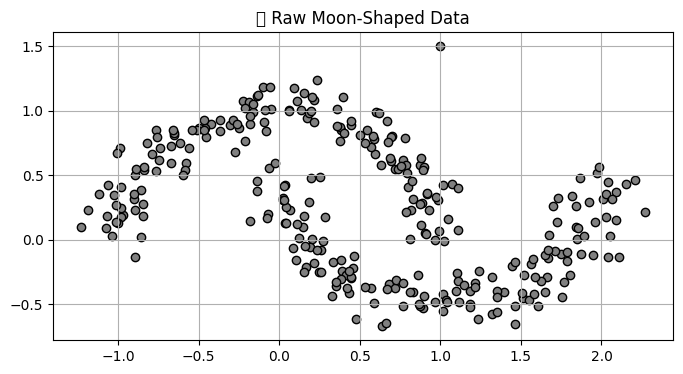

In [20]:
# -----------------------------------------
# Step 2: Visualize the raw data
# -----------------------------------------

# Create a new figure with a specific size (in inches)
plt.figure(figsize=(8, 4))

# Scatter plot:
# - X[:, 0] → All rows, column 0 (x-coordinates)
# - X[:, 1] → All rows, column 1 (y-coordinates)
# - c='gray' → All points are gray
# - edgecolor='k' → Points have a black outline ('k' stands for black)
plt.scatter(X[:, 0], X[:, 1], c='gray', edgecolor='k')

# Add a title to the plot
plt.title("🌙 Raw Moon-Shaped Data")

# Show grid lines for better readability
plt.grid(True)

# Display the plot
plt.show()


In [21]:
# -----------------------------------------
# Step 3: Run DBSCAN clustering
# -----------------------------------------

# Initialize the custom DBSCAN clusterer
# eps=0.3 → Radius of neighborhood (how far to search for neighbors)
# min_samples=5 → Minimum number of points to form a dense region (core point)
clusterer = DBSCANCluster(eps=0.2, min_samples=5)

# Perform clustering:
# - .fit_predict(X) does two things:
#   1. Fits the model on the data
#   2. Returns an array of cluster labels
labels = clusterer.fit_predict(X)

# Example output for `labels`:
# [0, 0, 1, 1, -1, 0, ...]
# Note: -1 indicates a noise point (not part of any cluster)

c:\Users\Logan\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


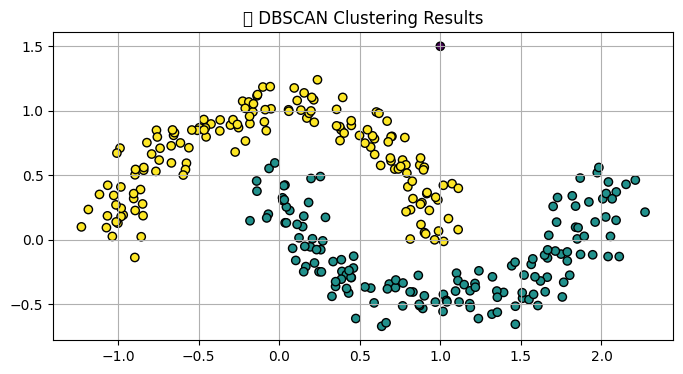

In [22]:
# -----------------------------------------
# Step 4: Visualize the clusters
# -----------------------------------------

# Create a new plot
plt.figure(figsize=(8, 4))

# Plot points again, but now colored by their cluster label
# cmap='viridis' → A pretty color map for clusters
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', edgecolor='k')

# Title for the clustered result
plt.title("🎯 DBSCAN Clustering Results")

# Add grid
plt.grid(True)

# Show the clustered plot
plt.show()

In [23]:
# -----------------------------------------
# Step 5: Inspect result details
# -----------------------------------------

# Print the unique cluster labels (convert np.int64 to plain int)
print("🏷️ Unique clusters found:", {int(label) for label in set(labels)})

# Count how many points are labeled -1 (noise)
print("❌ Noise points (label = -1):", list(labels).count(-1))


🏷️ Unique clusters found: {0, 1, -1}
❌ Noise points (label = -1): 1
